<a href="https://colab.research.google.com/github/saipragna25/deep-learning-asgn-neural-networks-/blob/main/DLANN_from_scratch_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

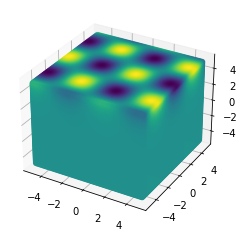

/usr/local/lib/python3.9/dist-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([1000000])) that is different to the input size (torch.Size([1000000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [ ]:
import torch
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Define the 3 variables based non-linear equation
def equation(x, y, z):
    return (np.sin(x) * np.cos(y) * np.exp(z))

# Generate synthetic data using the equation
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
z = np.linspace(-5, 5, 100)
X, Y, Z = np.meshgrid(x, y, z)
data = np.array([X.flatten(), Y.flatten(), Z.flatten()]).T
labels = equation(X, Y, Z).flatten()

# Plot the data using a 4D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z, c=labels)
plt.show()

# Define the neural network class
class NeuralNetwork(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        # Initialize the weights and biases for the input layer and hidden layer
        self.W1 = torch.nn.Parameter(torch.randn(input_size, hidden_size))
        self.b1 = torch.nn.Parameter(torch.zeros(hidden_size))
        # Initialize the weights and biases for the hidden layer and output layer
        self.W2 = torch.nn.Parameter(torch.randn(hidden_size, output_size))
        self.b2 = torch.nn.Parameter(torch.zeros(output_size))
        
    def forward(self, X):
        # Calculate the output of the hidden layer
        self.z1 = torch.matmul(X, self.W1) + self.b1
        self.a1 = torch.relu(self.z1)
        # Calculate the output of the output layer
        self.z2 = torch.matmul(self.a1, self.W2) + self.b2
        self.y_hat = self.z2
        return self.y_hat
    
# Define the loss function
loss_fn = torch.nn.MSELoss()

# Initialize the neural network
model = NeuralNetwork(3, 5, 1)

# Initialize the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Train the neural network
for epoch in range(1000):
    # Perform forward propagation to calculate the predicted output
    y_hat = model(torch.Tensor(data))
    # Calculate the loss
    loss = loss_fn(y_hat, torch.Tensor(labels))
    # Perform backward propagation to calculate the gradients and update the weights and biases
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # Print the loss for every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss {loss.item():.4f}")

# Plot the predicted output using a 4D plot
y_pred = model(torch.Tensor(data)).detach().numpy()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z, c=y_pred)
plt.show()


In [ ]:
# Generate synthetic data
x = np.random.rand(100, 3)
y = 5 * x[:, 0] - 3 * x[:, 1] + 2 * x[:, 2] + 0.5 * np.random.randn(100)

# Define activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

In [ ]:
# Define hyperparameters
learning_rate = 0.01
num_epochs = 1000
num_hidden1 = 10
num_hidden2 = 5

In [ ]:
# Initialize weights and biases
w1 = np.random.randn(3, num_hidden1)
b1 = np.zeros(num_hidden1)
w2 = np.random.randn(num_hidden1, num_hidden2)
b2 = np.zeros(num_hidden2)
w3 = np.random.randn(num_hidden2, 1)
b3 = np.zeros(1)

In [ ]:
# Training loop
for epoch in range(num_epochs):
    # Forward pass
    z1 = np.dot(x, w1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, w2) + b2
    a2 = sigmoid(z2)
    z3 = np.dot(a2, w3) + b3
    y_pred = z3.ravel()
    

In [ ]:
# Compute loss
mse_loss = np.mean(np.square(y_pred - y))
if epoch % 100 == 0:
 print(f"Epoch {epoch}: MSE loss = {mse_loss:.4f}")

In [ ]:
# Backward pass
dz3 = 2 * (y_pred - y) / y.size
dw3 = np.dot(a2.T, dz3)
db3 = np.sum(dz3, axis=0)
da2 = np.dot(dz3.reshape(-1, 1), w3.T)
dz2 = da2 * sigmoid(z2) * (1 - sigmoid(z2))
dw2 = np.dot(a1.T, dz2)
db2 = np.sum(dz2, axis=0)
da1 = np.dot(dz2, w2.T)
dz1 = np.where(z1 > 0, da1, 0)
dw1 = np.dot(x.T, dz1)
db1 = np.sum(dz1, axis=0)

In [ ]:
# Update weights and biases
w3 -= learning_rate * dw3.reshape(w3.shape)
b3 -= learning_rate * db3
w2 -= learning_rate * dw2
b2 -= learning_rate * db2
w1 -= learning_rate * dw1
b1 -= learning_rate * db1

In [ ]:
# Print final weights and biases
print(f"w1 = {w1}")
print(f"b1 = {b1}")
print(f"w2 = {w2}")
print(f"b2 = {b2}")
print(f"w3 = {w3}")
print(f"b3 = {b3}")


w1 = [[ 2.10236321e-01  9.07714437e-01  9.54591045e-01 -1.24142661e+00
   1.68181252e+00 -1.34260817e+00  1.01660447e+00  4.46304184e-02
  -5.41574593e-01  3.43179181e-01]
 [ 1.10292015e+00  5.22544346e-01 -6.44884929e-01  8.03073104e-01
  -1.83585862e+00  2.41486692e-01  7.05262737e-01 -3.17189178e-01
   1.06833678e-03  6.76065248e-01]
 [ 2.38599956e-01 -1.19025895e+00 -9.54202470e-01  1.44895453e+00
   7.86326016e-01 -1.04673465e+00 -5.77266348e-01  1.35288146e+00
   5.08605770e-01  2.82387347e-01]]
b1 = [-9.18225794e-03 -1.32381791e-03 -4.24350868e-03  4.77868305e-03
  8.06411530e-03  1.06340740e-05  7.49074055e-03  1.00332190e-02
 -1.95936107e-03 -1.06961731e-02]
w2 = [[ 0.6970308  -1.59105709 -0.06368655  1.41209784  0.92334701]
 [-0.22348703 -0.0638947  -0.27321406  0.12164553  0.85187205]
 [ 2.27267915  0.35003306  1.60628811  1.10539309 -1.25260583]
 [ 0.35294655 -0.09795077  0.0038521  -1.21167848  0.22754927]
 [-0.06839454 -0.03234163  1.58318999 -0.47203601 -0.19314143]
 [ 1

ValueError: ignored

In [ ]:
# Predict on new data
x_new = np.random.rand(10, 3)
y_new = np.dot(np.dot(np.dot(x_new, w1), w2), w3).ravel() + np.dot(np.dot(a1, w2), b3.reshape(w3.shape)).ravel()
print(f"Predictions on new data: {y_new}")

ValueError: ignored